In [1]:
%run parse_mails2.py

df = parse_maildir2("../data/maildir", False)

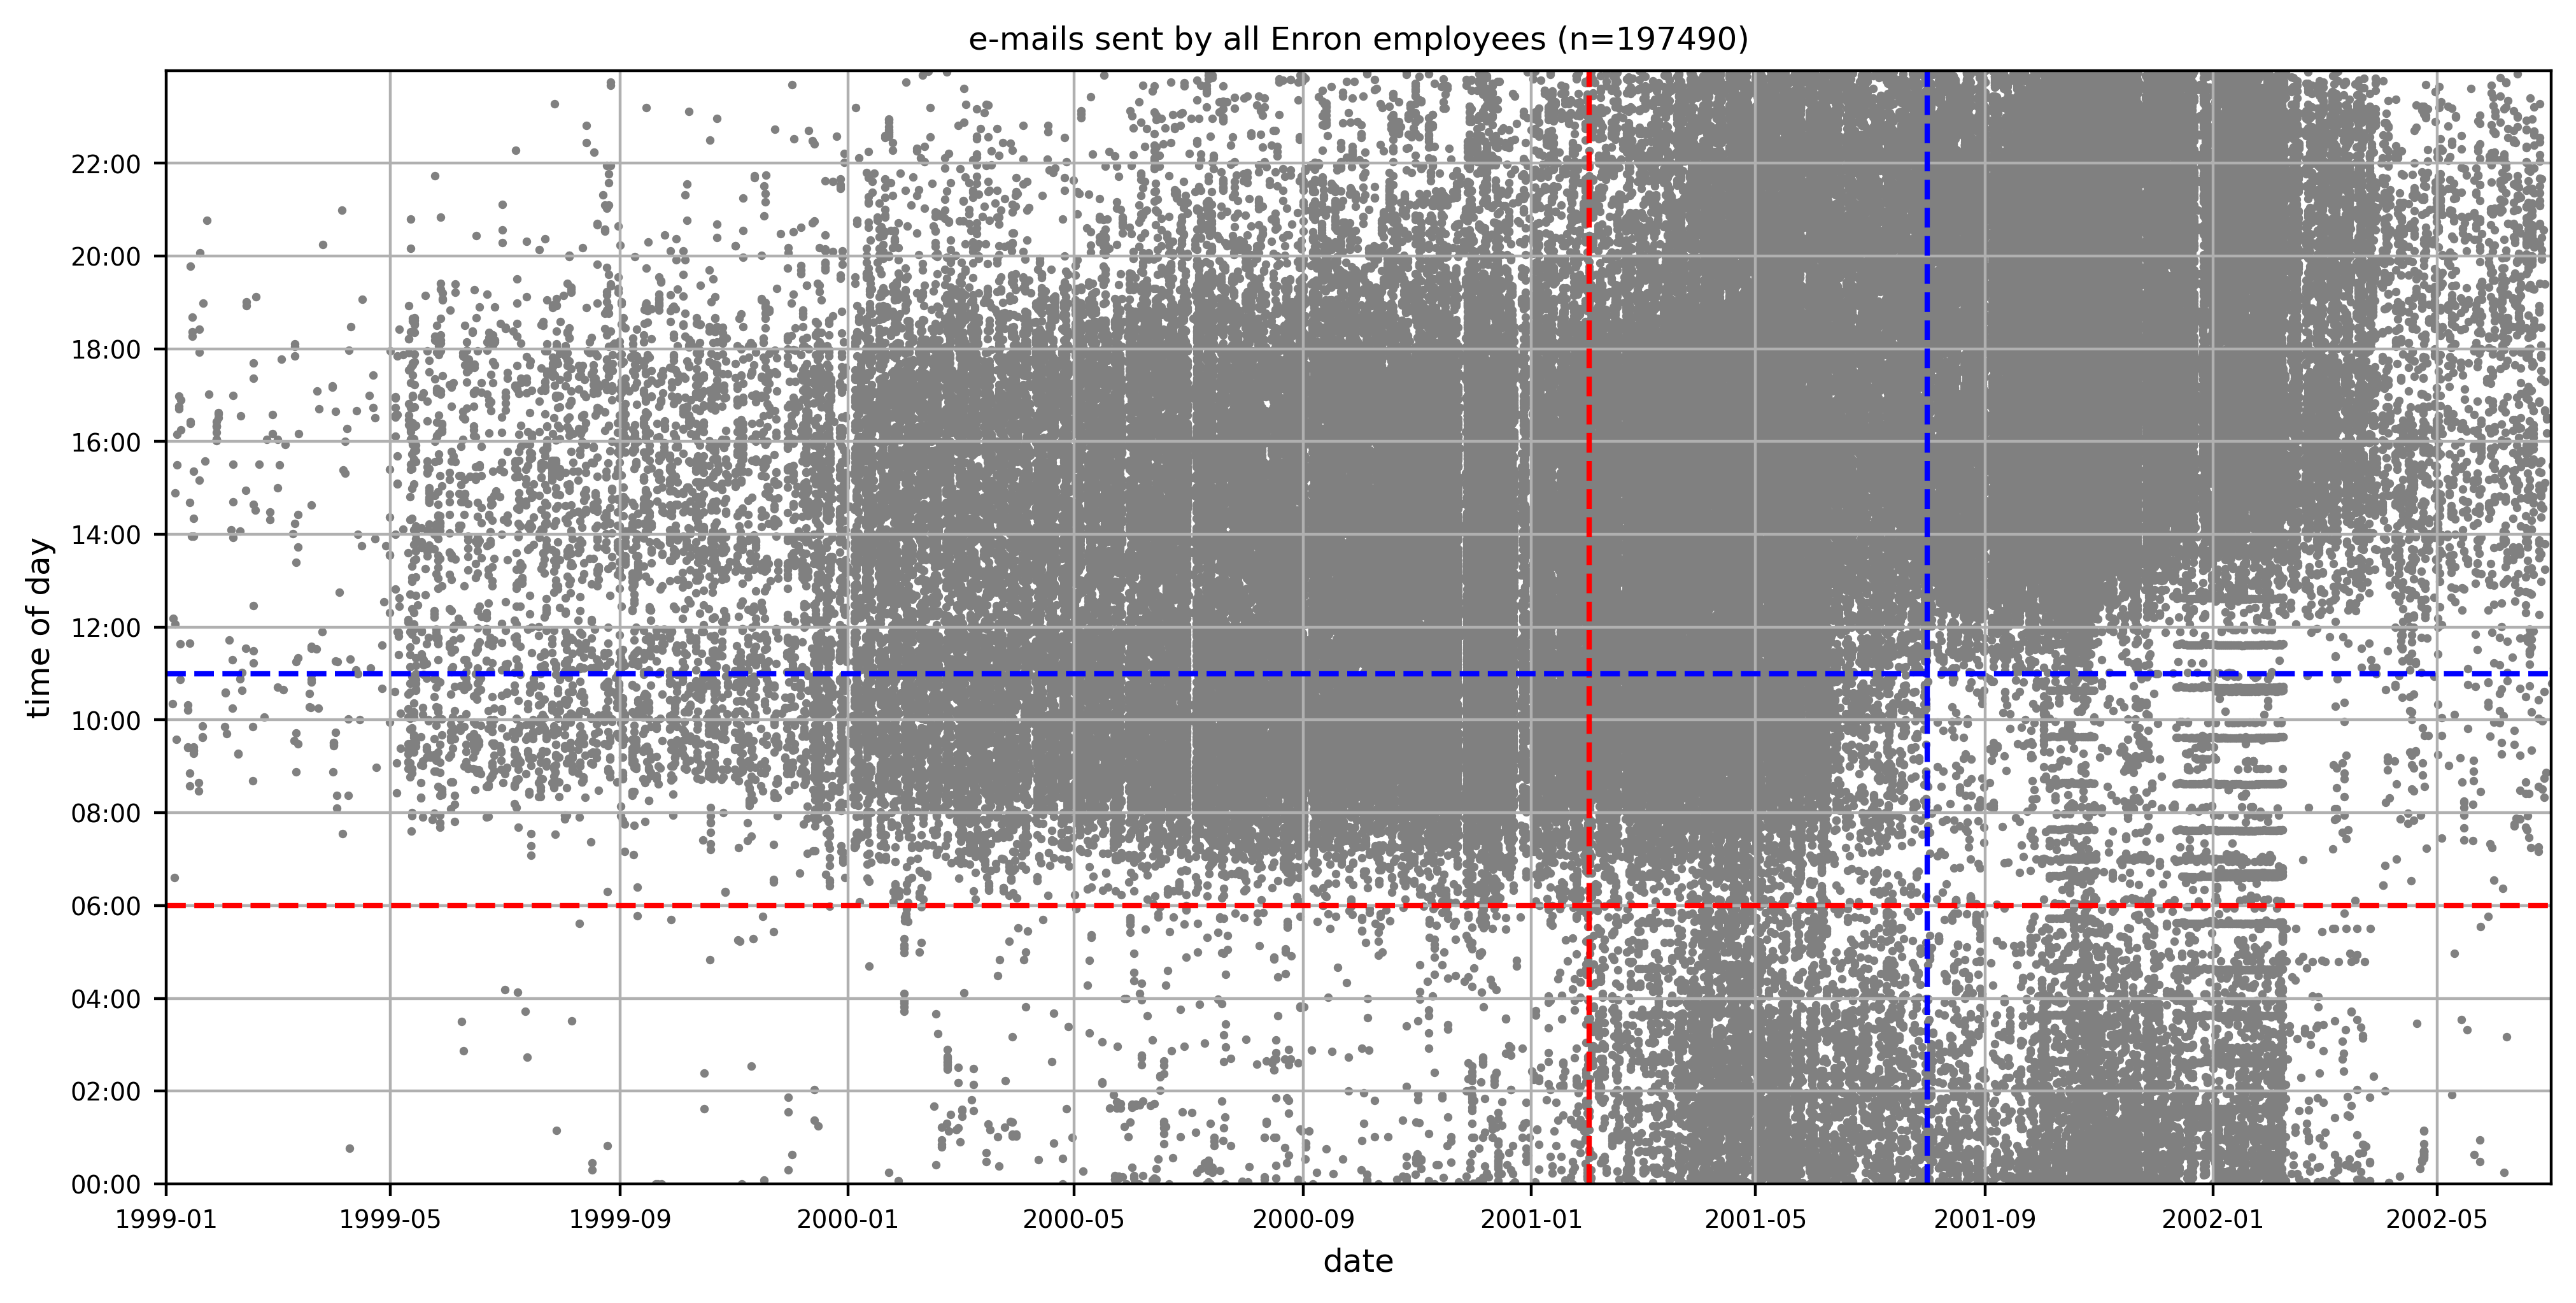

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from tueplots import bundles
import datetime as dt
plt.rcParams.update(bundles.neurips2021(usetex=False))

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=400)
def seconds_in_time(x, pos):
    hours = x // 3600
    minutes = (x - (hours * 3600)) // 60
    return '%s:%s' % (str(hours).zfill(2), str(minutes).zfill(2))

formatter = FuncFormatter(seconds_in_time)

ax.scatter(df["date"], df["seconds_since_midnight"], s=2, color="grey")
ax.grid(True)
ax.set_title(f"e-mails sent by all Enron employees (n={len(df)})")
ax.vlines(dt.datetime(2001, 2, 1), 0, 24 * 60 * 60, color="red", linestyles="dashed")
ax.vlines(dt.datetime(2001, 8, 1), 0, 24 * 60 * 60, color="blue", linestyles="dashed")
ax.hlines(6 * 60 * 60, dt.datetime(1999, 1, 1), dt.datetime(2002, 7, 1), color="red", linestyles="dashed")
ax.hlines(11 * 60 * 60, dt.datetime(1999, 1, 1), dt.datetime(2002, 7, 1), color="blue", linestyles="dashed")
ax.set_xlabel("date")
ax.set_ylabel("time of day")
ax.set_yticks([i * 7200 for i in range(12)])
ax.set_ylim(0, 60*60*24)
ax.set_xlim(dt.datetime(1999, 1, 1), dt.datetime(2002, 7, 1))
ax.yaxis.set_major_formatter(formatter)
plt.savefig("fig001_mail_all.png",bbox_inches="tight")
plt.show()
